In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
     

In [2]:
!pip install rake-nltk

In [3]:
!pip install stylecloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.4/161.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 18.6 MB/s eta 0:00:00
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259491 sha256=d5679a76a9b047b43f2612f0b5f37d5254bae0bd173c4e4605401e3195af1ee8
  Stored in directory: /root/.cache/pip/wheels/aa/c8/27/9374f4fc7133015d902b5e2c75ad951edd57eb1ae948495915
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=0c4e3d835e08f5ffd5d72505c204fee3d9a5e2041378e7f7a67cdb930a113b59
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/

In [4]:
#Import the necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from rake_nltk import Rake
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
import spacy
from spacy import displacy
from termcolor import colored

In [5]:
#1. Data Acquisition
#Load the data
patient_note = pd.read_csv('/content/patient_notes.csv')
features = pd.read_csv('/content/features.csv')
train = pd.read_csv('/content/train.csv')

In [6]:
patient_note.head()

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student heal..."
1,1,0,17 yo male with recurrent palpitations for the...
2,2,0,Dillon Cleveland is a 17 y.o. male patient wit...
3,3,0,a 17 yo m c/o palpitation started 3 mos ago; \...
4,4,0,17yo male with no pmh here for evaluation of p...


In [7]:
features.head()

,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myoc...
1,1,0,Family-history-of-thyroid-disorder
2,2,0,Chest-pressure
3,3,0,Intermittent-symptoms
4,4,0,Lightheaded


In [8]:
train.head()

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693']
2,00016_002,0,16,2,['chest pressure'],['203 217']
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258']


In [9]:
patient_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42146 entries, 0 to 42145
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pn_num      42146 non-null  int64 
 1   case_num    42146 non-null  int64 
 2   pn_history  42146 non-null  object
dtypes: int64(2), object(1)
memory usage: 987.9+ KB


In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   feature_num   143 non-null    int64 
 1   case_num      143 non-null    int64 
 2   feature_text  143 non-null    object
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14300 entries, 0 to 14299
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           14300 non-null  object
 1   case_num     14300 non-null  int64 
 2   pn_num       14300 non-null  int64 
 3   feature_num  14300 non-null  int64 
 4   annotation   14300 non-null  object
 5   location     14300 non-null  object
dtypes: int64(3), object(3)
memory usage: 670.4+ KB


In [12]:
patient_note.shape

(42146, 3)

In [13]:
features.shape

(143, 3)

In [14]:
train.shape

(14300, 6)

In [15]:
#2. Text Cleaning
#Remove null values
patient_note.dropna(subset=['pn_history'], inplace=True)

In [16]:
#Text normalization function
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [17]:
patient_note['pn_history'] = patient_note['pn_history'].apply(normalize_text)

In [18]:
#3. Pre-Processing (Basic / Advanced)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [19]:
def preprocess_text(text):
    word_tokens = word_tokenize(text)
    filtered_text = [w for w in word_tokens if not w in stop_words]
    stemmed_text = [stemmer.stem(w) for w in filtered_text]
    lemmatized_text = [lemmatizer.lemmatize(w) for w in stemmed_text]
    return ' '.join(lemmatized_text)

patient_note['pn_history'] = patient_note['pn_history'].apply(preprocess_text)

In [20]:
#NER using Hugging Face Transformers
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
model = AutoModelForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
nlp_ner = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [21]:
#Function to process NER for a specific patient note
def extract_named_entities(text):
    ner_results = nlp_ner(text)
    entities = [entity['word'] for entity in ner_results]
    return ' '.join(entities)

In [22]:
#4. Feature Extraction / Vectorization
#Extract keywords using Rake
def extract_keywords(pn_history):
    r = Rake(punctuations=[')', '(', ',', ':', ')', '.', ',', '.'])
    r.extract_keywords_from_text(pn_history)
    phrase_df = pd.DataFrame(r.get_ranked_phrases_with_scores(), columns=['score', 'phrase'])
    phrase_df = phrase_df.loc[phrase_df.score > 5]
    return phrase_df['phrase'].tolist()

In [23]:
patient_note["keywords"] = patient_note["pn_history"].apply(extract_keywords)
print(patient_note.sample(8))

       pn_num  case_num                                         pn_history  \
15596   40838         4  yo f present two week nervous deni associ symp...   
5735    30709         3  mr hamilton year old male present today evalu ...   
41732   94901         9  f present headach hour woke sleep wors today p...   
22187   52053         5  patient year old woman year histori heart palp...   
23531   53432         5  m whelan year old femal present chief complain...   
26278   56250         5  yo femal present fu ed visit week ago palpit f...   
27725   60690         6  yo male patient present chest pain nonradi che...   
6820    31821         3  yo co epigastr pain x start gradual episod epi...   

                                                keywords  
15596  [yo f present two week nervous deni associ sym...  
5735   [mr hamilton year old male present today evalu...  
41732  [f present headach hour woke sleep wors today ...  
22187  [patient year old woman year histori heart pal...  
23

In [24]:
#Merge patient_note and train_df based on pn_num
merged_df = pd.merge(patient_note, train, on='pn_num')

In [25]:
#Debug: Print the head of the merged DataFrame to verify correct merging
print(merged_df.head())

   pn_num  case_num_x                                         pn_history  \
0      16           0  hpi yo present palpit patient report month int...   
1      16           0  hpi yo present palpit patient report month int...   
2      16           0  hpi yo present palpit patient report month int...   
3      16           0  hpi yo present palpit patient report month int...   
4      16           0  hpi yo present palpit patient report month int...   

                                            keywords         id  case_num_y  \
0  [hpi yo present palpit patient report month in...  00016_000           0   
1  [hpi yo present palpit patient report month in...  00016_001           0   
2  [hpi yo present palpit patient report month in...  00016_002           0   
3  [hpi yo present palpit patient report month in...  00016_003           0   
4  [hpi yo present palpit patient report month in...  00016_004           0   

   feature_num                                annotation            

In [26]:
import numpy as np  # Import the NumPy library
# Using TF-IDF for vectorization
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(merged_df['pn_history']).toarray()

In [27]:
#Create binary labels based on annotations
def create_labels(annotation):
    specific_annotation = 'thyroid disease'  # Define a specific annotation
    return 1 if specific_annotation in annotation else 0

In [28]:
merged_df['label'] = merged_df['annotation'].apply(create_labels)

In [29]:
#Debug: Print the distribution of labels
print("Label distribution in the merged dataset:")
print(merged_df['label'].value_counts())

Label distribution in the merged dataset:
label
0    14286
1       14
Name: count, dtype: int64


In [30]:
y = merged_df['label'].values

In [31]:
#Check shapes of X and y before splitting
X.shape

(14300, 4933)

In [32]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#Debug: Print the distribution of labels in the training set
print("Label distribution in the training set:")
print(pd.Series(y_train).value_counts())

Label distribution in the training set:
0    11429
1       11
Name: count, dtype: int64


In [34]:
#Ensure that the training set has both classes
if len(pd.Series(y_train).value_counts()) < 2:
    raise ValueError("The training set does not contain at least two classes.")

In [35]:
#5. Model (ML/DL)
#Random Forest Classifier with GridSearchCV
rf_clf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [36]:
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

In [37]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [38]:
best_rf_clf = grid_search_rf.best_estimator_

In [39]:
#Logistic Regression with GridSearchCV
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [40]:
grid_search_lr = GridSearchCV(estimator=lr_clf, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)

In [41]:
grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [42]:
best_lr_clf = grid_search_lr.best_estimator_

In [43]:
#Model predictions
rf_preds = best_rf_clf.predict(X_test)
lr_preds = best_lr_clf.predict(X_test)

In [44]:
#6. Evaluation (Intrinsic/Extrinsic)
#Evaluation for Random Forest Classifier
print("Random Forest Classifier")
print("Best Parameters:", grid_search_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Random Forest Classifier
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9989510489510489
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2857
           1       0.00      0.00      0.00         3

    accuracy                           1.00      2860
   macro avg       0.50      0.50      0.50      2860
weighted avg       1.00      1.00      1.00      2860



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


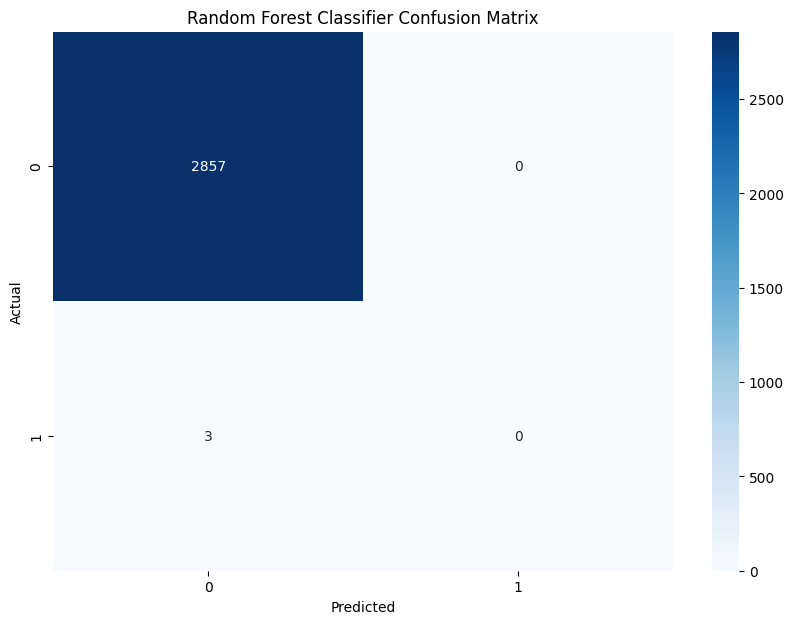

In [45]:
#Confusion Matrix for Random Forest Classifier
rf_cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(10,7))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [46]:
#Evaluation for Logistic Regression
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

Logistic Regression
Accuracy: 0.9989510489510489
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2857
           1       0.00      0.00      0.00         3

    accuracy                           1.00      2860
   macro avg       0.50      0.50      0.50      2860
weighted avg       1.00      1.00      1.00      2860



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


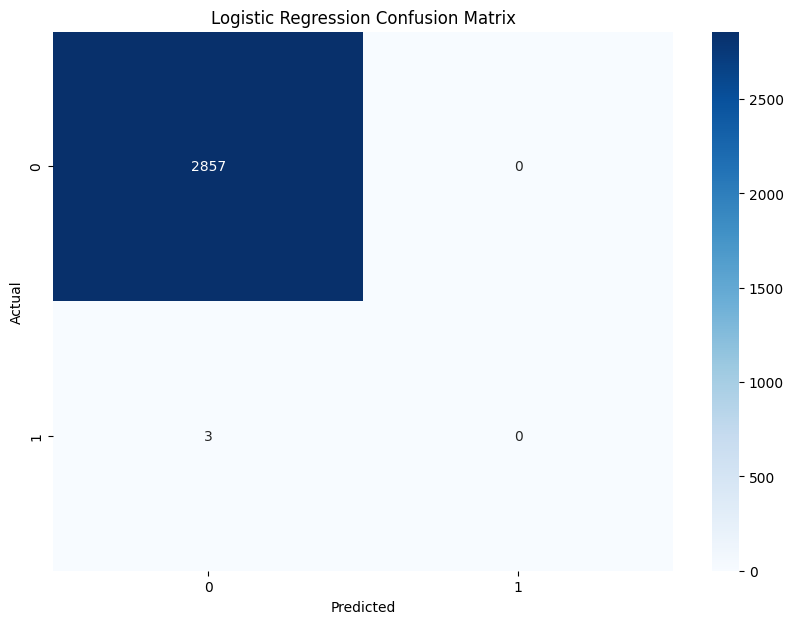

In [47]:
#Confusion Matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_preds)
plt.figure(figsize=(10,7))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [51]:
#7. Annotation and Visualization
nlp_spacy = spacy.load("en_core_web_sm")

def patient_data(pn_num):
    subset = train[train['pn_num'] == pn_num]
    features_lst = subset['feature_num'].tolist()
    annotations_lst = subset['annotation'].tolist()

    subset_c = subset.copy()
    subset_c['location'] = subset_c['location'].apply(eval)
    subset_c['annotation'] = subset_c['annotation'].apply(eval)
    locations = subset_c["location"]
    annotations = subset_c["annotation"]

    print("*"*80)
    print(colored("Patient Number: " + str(pn_num), 'green'))
    patient_history = patient_note[patient_note['pn_num'] == pn_num]['pn_history'].item()

    print(colored("\nAnnotated Patient History", 'green'))

    ents = []
    for location in locations:
        for i in range(len(location)):
            for loc in location:
                val = loc.split()
                ents.append({
                    'start': int(val[0]),
                    'end': int(val[1]),
                    'label': "Annotation"
                })
    ents = sorted(ents, key=lambda i: i['start'])

    doc = {
        'text': patient_history,
        'ents': ents
    }

    colors = {"Annotation": "linear-gradient(to right, #2980b9, #6dd5fa, #ffffff);"}
    options = {"colors": colors}
    displacy.render(doc, style='ent', options=options, manual=True, jupyter=True)

    print(colored("\nVisualizing NER", 'green'))
    doc = nlp_spacy(patient_history)
    displacy.render(doc, style='ent', jupyter=True)

    print(colored("\nVisualizing POS tagging", 'green'))
    sentences = sent_tokenize(patient_history)
    word_count = lambda sentence: len(word_tokenize(sentence))
    pos_text = max(sentences, key=word_count)
    doc = nlp_spacy(pos_text)
    displacy.render(doc, style="dep")

    print(colored("\nFeatures", 'green'))
    for feature_num in features_lst:
        feature = features[features['feature_num'] == feature_num]['feature_text'][feature_num]
        print(colored(feature, 'blue'))

# Process and visualize specific patient notes
patient_data(16)
patient_data(46)
patient_data(100)

********************************************************************************
Patient Number: 16

Annotated Patient History



Visualizing NER



Visualizing POS tagging



Features
Family-history-of-MI-OR-Family-history-of-myocardial-infarction
Family-history-of-thyroid-disorder
Chest-pressure
Intermittent-symptoms
Lightheaded
No-hair-changes-OR-no-nail-changes-OR-no-temperature-intolerance
Adderall-use
Shortness-of-breath
Caffeine-use
heart-pounding-OR-heart-racing
Few-months-duration
17-year
Male
********************************************************************************
Patient Number: 46

Annotated Patient History



Visualizing NER



Visualizing POS tagging



Features
Family-history-of-MI-OR-Family-history-of-myocardial-infarction
Family-history-of-thyroid-disorder
Chest-pressure
Intermittent-symptoms
Lightheaded
No-hair-changes-OR-no-nail-changes-OR-no-temperature-intolerance
Adderall-use
Shortness-of-breath
Caffeine-use
heart-pounding-OR-heart-racing
Few-months-duration
17-year
Male
********************************************************************************
Patient Number: 100

Annotated Patient History



Visualizing NER



Visualizing POS tagging



Features
Family-history-of-MI-OR-Family-history-of-myocardial-infarction
Family-history-of-thyroid-disorder
Chest-pressure
Intermittent-symptoms
Lightheaded
No-hair-changes-OR-no-nail-changes-OR-no-temperature-intolerance
Adderall-use
Shortness-of-breath
Caffeine-use
heart-pounding-OR-heart-racing
Few-months-duration
17-year
Male
